<a href="https://colab.research.google.com/github/MiqueiasMaia/BioPython/blob/master/Biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install biopython
from Bio.Seq import Seq

In [30]:
#### BASICS ####
#instância de fita
first_seq = Seq("ATGGCATTCGCAAGGGTGCCCATAGAT")
print("Original 5l-3l: ", first_seq,'\n')

#obtenção de fita complementar
compl_seq = first_seq.complement()
print("Complementary 3l-5l: ",compl_seq,'\n')

#obtenção de fita reversa complementar
compl_rev_seq = first_seq.reverse_complement()
print("Reverse: ",compl_rev_seq,'\n')

#obtenção de RNA Mensageiro
rna_seq = first_seq.transcribe()
print("RNA Messenger: ", rna_seq,'\n')

#transcrição reversa
dna_seq = rna_seq.back_transcribe()
print("DNA: ", dna_seq,'\n')

#obtenção de proteína do RNA mensageiro
protein_seq = rna_seq.translate(to_stop=True)
print("Protein: ", protein_seq,'\n')

#obtenção de proteína diretamente do DNA
protein_seq = first_seq.translate()
print("Protein: ", protein_seq)

Original 5l-3l:  ATGGCATTCGCAAGGGTGCCCATAGAT 

Complementary 3l-5l:  TACCGTAAGCGTTCCCACGGGTATCTA 

Reverse:  ATCTATGGGCACCCTTGCGAATGCCAT 

RNA Messenger:  AUGGCAUUCGCAAGGGUGCCCAUAGAU 

DNA:  ATGGCATTCGCAAGGGTGCCCATAGAT 

Protein:  MAFARVPID 

Protein:  MAFARVPID


In [31]:
#Alinhamento de pares de sequência
from Bio import pairwise2

dnaSeq1 = Seq('TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA')
dnaSeq2 = Seq('GGGGGGTGTCTTATTTCACACAACTTGTCTTGAAATTGGGGGGAAATGTTTT')

##alinhamento.globalManualGapsiguais(sequencia1, sequencia2, match, missmatch, gap, extensao do gap)
align = pairwise2.align.globalms(dnaSeq1, dnaSeq2, 1, -1, -2, -0.5)

In [32]:
align

[Alignment(seqA='TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA', seqB='-----GGGGGGTGTCTTATTTC--------------------ACACAACTTGTCTTGAAATT-GGGGGGAAATG-TTTT', score=8.5, start=0, end=79),
 Alignment(seqA='TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA', seqB='G-----GGGGGTGTCTTATTTC--------------------ACACAACTTGTCTTGAAATT-GGGGGGAAATG-TTTT', score=8.5, start=0, end=79),
 Alignment(seqA='TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA', seqB='GG-----GGGGTGTCTTATTTC--------------------ACACAACTTGTCTTGAAATT-GGGGGGAAATG-TTTT', score=8.5, start=0, end=79),
 Alignment(seqA='TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA', seqB='GGG-----GGGTGTCTTATTTC--------------------ACACAACTTGTCTTGAAATT-GGGGGGAAATG-TTTT', score=8.5, start=0, end=79),
 Alignment(seqA='TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA', seqB='-----GGGGGGTGTCTTATTTC---------

In [33]:
print(pairwise2.format_alignment(*align[0]))

TCACTTCTGGATGTCTTATTTCTTTGCATGTTAATCGTGTTGACACAACTTGTCTTGAAATTAAGTTTAAAATGAAATA
     ...||.|||||||||||                    |||||||||||||||||||| .|....||||| ..|.
-----GGGGGGTGTCTTATTTC--------------------ACACAACTTGTCTTGAAATT-GGGGGGAAATG-TTTT
  Score=8.5



In [34]:
#Alinhamento com matriz de substituição
from Bio.SubsMat import MatrixInfo as matlist

matrizBlosum = matlist.blosum62
#matrizBlosum

proteinSeq1 = Seq('VLSPADKTNIKASWEKIGSHGGEYGAEALERTFLCFPTTKTYFPHFDLSHGSAQVKAHGKKVADALTNAVGHLDDLPGALSALSDLHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF')
proteinSeq2 = Seq('VLSPADKTNVLSVLSVLSVLSSHGGEYGAEALERTVKAHGKKVADALTSAAAAAAAAHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF')

alignProtein = pairwise2.align.globaldx(proteinSeq1, proteinSeq2, matrizBlosum)
alignProtein

[Alignment(seqA='VLSPADKTNIK-A--SWEKIG-S----HGGEYGAEALERTFLCFPTTKTYFPHFDLSHGSAQVKAHGKKVADALTNAVGHLDDLPGALSALSDL---HAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', seqB='VLSPADKTNV-LSVLS---V-LSVLSSHGGEYGAEALER---------T-------------VKAHGKKVADALTSA---------A-AA-A--AAAHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', score=376.0, start=0, end=128),
 Alignment(seqA='VLSPADKTNIK-A--SWEKIG----S-HGGEYGAEALERTFLCFPTTKTYFPHFDLSHGSAQVKAHGKKVADALTNAVGHLDDLPGALSALSDL---HAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', seqB='VLSPADKTNV-LSVLS---V-LSVLSSHGGEYGAEALER---------T-------------VKAHGKKVADALTSA---------A-AA-A--AAAHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', score=376.0, start=0, end=128),
 Alignment(seqA='VLSPADKTNIK-A--SWEKI-G--S-HGGEYGAEALERTFLCFPTTKTYFPHFDLSHGSAQVKAHGKKVADALTNAVGHLDDLPGALSALSDL---HAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', seqB='VLSPADKTNV-LSVLS---VLSVLSSHGGEYGAEALER---------T-------------VKAHGKKVADALTSA---------A-AA-A--AAAHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF', score=376.0, start=0, end=127),
 Alignment(seqA='VLSPADKTNIK-A--SWEK---IG-S-HGGEYGA

In [35]:
print(pairwise2.format_alignment(*alignProtein[0]))

VLSPADKTNIK-A--SWEKIG-S----HGGEYGAEALERTFLCFPTTKTYFPHFDLSHGSAQVKAHGKKVADALTNAVGHLDDLPGALSALSDL---HAYKLRVDPVNFKLLSHCLLVTLASHHPAEF
|||||||||.  .  |   .  |    ||||||||||||         |             |||||||||||||.|         | .| .     |||||||||||||||||||||||||||||||
VLSPADKTNV-LSVLS---V-LSVLSSHGGEYGAEALER---------T-------------VKAHGKKVADALTSA---------A-AA-A--AAAHAYKLRVDPVNFKLLSHCLLVTLASHHPAEF
  Score=376



In [58]:
#NCBI search

from Bio import Entrez
from Bio import SeqIO

In [59]:
Entrez.email = 'miqueias.maia@aluno.uece.br'
handle = Entrez.esearch(db='nucleotide',term='SARS-CoV-2 human', retmax='10')
record = Entrez.read(handle)

record

{'Count': '305768', 'RetMax': '10', 'RetStart': '0', 'IdList': ['2043521146', '2043521133', '2043521120', '2043521107', '2043521094', '2043521081', '2043521068', '2043521055', '2043521042', '2043521029'], 'TranslationSet': [{'From': 'SARS-CoV-2', 'To': '"Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All Fields]'}, {'From': 'human', 'To': '"Homo sapiens"[Organism] OR human[All Fields]'}], 'TranslationStack': [{'Term': '"Severe acute respiratory syndrome coronavirus 2"[Organism]', 'Field': 'Organism', 'Count': '498626', 'Explode': 'Y'}, {'Term': 'SARS-CoV-2[All Fields]', 'Field': 'All Fields', 'Count': '503165', 'Explode': 'N'}, 'OR', 'GROUP', {'Term': '"Homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '27860979', 'Explode': 'Y'}, {'Term': 'human[All Fields]', 'Field': 'All Fields', 'Count': '49650562', 'Explode': 'N'}, 'OR', 'GROUP', 'AND', 'GROUP'], 'QueryTranslation': '("Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All Fiel

In [61]:
record['IdList']

['2043521146', '2043521133', '2043521120', '2043521107', '2043521094', '2043521081', '2043521068', '2043521055', '2043521042', '2043521029']

In [39]:
seq_handle = Entrez.efetch(db='nucleotide', rettype='fasta', id=record['IdList'])
seq_record = SeqIO.parse(seq_handle, 'fasta')
SeqIO.write(seq_record, 'SARS-Cov-2.fasta','fasta')

10

In [40]:
archive = open('SARS-Cov-2.fasta','r')
seqs = []
for s in SeqIO.parse(archive,'fasta'):
  seqs.append(s)

In [41]:
seqs

[SeqRecord(seq=Seq('CTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCT...AAA'), id='MZ265002.1', name='MZ265002.1', description='MZ265002.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/VT-MASPHL-03767/2021, complete genome', dbxrefs=[]),
 SeqRecord(seq=Seq('CTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCT...AAA'), id='MZ265001.1', name='MZ265001.1', description='MZ265001.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/VT-MASPHL-03766/2021 ORF1ab polyprotein (ORF1ab), ORF1a polyprotein (ORF1ab), surface glycoprotein (S), ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), and ORF6 protein (ORF6) genes, complete cds; ORF7a protein (ORF7a) and ORF7b (ORF7b) genes, partial cds; and truncated ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds', dbxrefs=[]),
 SeqRecord(seq=Seq('CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...ATA'), id='MZ26500

In [42]:
seqs[2].seq

Seq('CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...ATA')

In [43]:
seqs[2].seq.complement()

Seq('GGTTGGTTGAAAGCTAGAGAACATCTAGACAAGAGATTTGCTTGAAATTTTAGA...TAT')

In [44]:
seqs[2].seq.transcribe()

Seq('CCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCU...AUA')

In [45]:
seqs[2].seq.transcribe().translate()

Seq('PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN**LITVVDRTRVTRLSSAGC...ILI')

In [46]:
from Bio.SeqUtils import GC 

In [47]:
#estatística de conteúdo GC
gc = GC(seqs[2].seq)
print(gc)

at = 100-gc 
print(at)

37.671968324273536
62.328031675726464


In [48]:
#alignSarsCov = pairwise2.align.globaldx(seqs[1].seq, seqs[2].seq, matrizBlosum)
#alignSarsCov

In [49]:
#print(pairwise2.format_alignment(*alignSarsCov[0]))

In [62]:
#GenBank Search

seq_handle2 = Entrez.efetch(db='nucleotide', rettype='gb', id='2043521120')
seq_record2 = SeqIO.parse(seq_handle2,'gb')

SeqIO.write(seq_record2, 'MZ265000.gb','gb')

1

In [63]:
from IPython.display import Image

In [64]:
!pip install reportlab

     |████████████████████████████████| 2.6MB 3.0MB/s 


In [65]:
from Bio.Graphics import GenomeDiagram
from reportlab.lib import colors
from reportlab.lib.units import cm 

In [66]:
rec = SeqIO.read('MZ265000.gb','gb')
rec

SeqRecord(seq=Seq('CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...ATA'), id='MZ265000.1', name='MZ265000', description='Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/MA-MASPHL-03764/2021 ORF1ab polyprotein (ORF1ab), ORF1a polyprotein (ORF1ab), surface glycoprotein (S), ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), truncated ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds', dbxrefs=['BioProject:PRJNA686883'])

In [67]:
rec.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(29802), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(234), ExactPosition(21515), strand=1), type='gene'),
 SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(234), ExactPosition(13428), strand=1), FeatureLocation(ExactPosition(13427), ExactPosition(21515), strand=1)], 'join'), type='CDS', location_operator='join'),
 SeqFeature(FeatureLocation(ExactPosition(234), ExactPosition(774), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(774), ExactPosition(2688), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(2688), ExactPosition(8523), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(8523), ExactPosition(10023), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(10023), ExactPosition(10941), strand=1), type='mat_peptide'),
 SeqFeature(FeatureLocation(ExactPosition(10941), ExactPosition(11802), strand=1)

In [73]:
genDiag = GenomeDiagram.Diagram('Isolate SARS-CoV-2/human/USA/MA-MASPHL-03764/2021')
genTrack_features = genDiag.new_track(1, name = 'Annotated features')
genFeatures_set = genTrack_features.new_set()

In [74]:
for feature in rec.features:
  if feature.type != 'gene':
    continue 
  if len(genFeatures_set) % 2 == 0:
    color = colors.blue
  else:
    color = colors.lightblue
  genFeatures_set.add_feature(feature, color=color, label=True, sigil='ARROW')

In [75]:
genDiag.draw(format='circular', circular=True, pagesize=(20*cm, 20*cm), start=0, end=len(rec), circle_core=0.7)

In [76]:
genDiag.write('sars_cov.png','png')

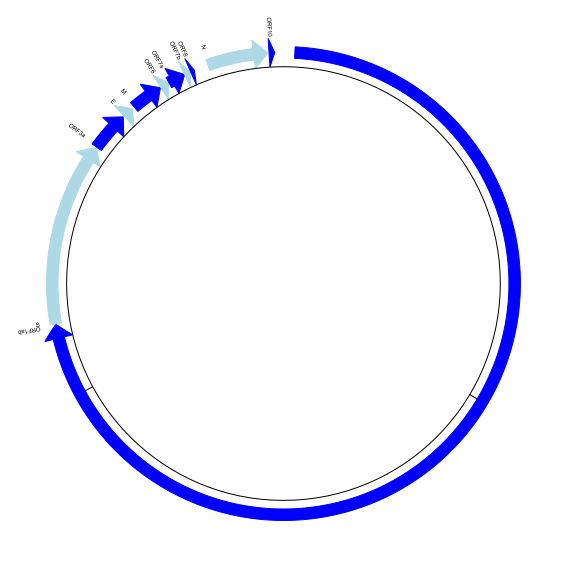

In [77]:
Image(filename='sars_cov.png')

In [83]:
genDiag = GenomeDiagram.Diagram('Isolate SARS-CoV-2/human/USA/MA-MASPHL-03764/2021')
genTrack_features = genDiag.new_track(1, name = 'Annotated features')
genFeatures_set = genTrack_features.new_set()

In [84]:
for feature in rec.features:
  if feature.type != 'gene':
    continue 
  if len(genFeatures_set) % 2 == 0:
    color = colors.blue
  else:
    color = colors.red
  genFeatures_set.add_feature(feature, color=color, label=True, sigil='BOX')

In [85]:
genDiag.draw(format='linear', circular=False, pagesize=(20*cm, 20*cm), start=0, end=len(rec), circle_core=0.7)

In [86]:
genDiag.write('sars_cov2.png','png')

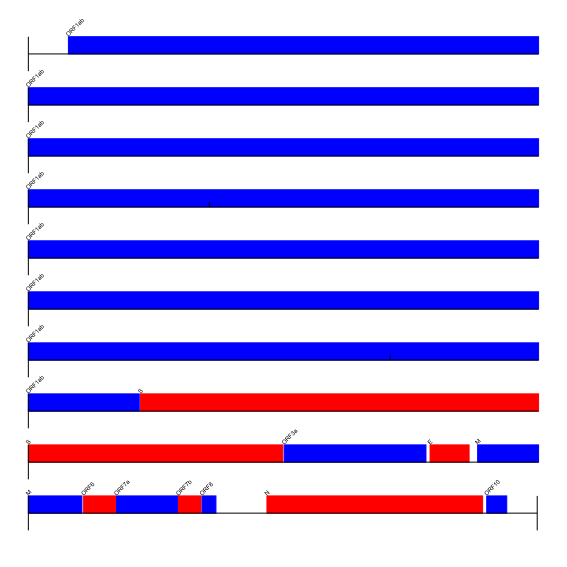

In [87]:
Image(filename='sars_cov2.png')

In [106]:
#Consultas ao BLAST
from Bio.Blast import NCBIWWW

In [105]:
#resultBlast = NCBIWWW.qblast('blastn','nt', seqs[0].seq, format_type='Text')

In [107]:
#Consultas ao KEGG

from Bio.KEGG import REST

In [108]:
res_kegg = REST.kegg_info('kegg').read()

In [109]:
print(res_kegg)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 98.0+/05-26, May 21
                 Kanehisa Laboratories
                 pathway     784,089 entries
                 brite       272,515 entries
                 module          519 entries
                 orthology    24,346 entries
                 genome        7,525 entries
                 genes     34,182,820 entries
                 compound     18,809 entries
                 glycan       11,039 entries
                 reaction     11,553 entries
                 rclass        3,168 entries
                 enzyme        7,852 entries
                 network       1,453 entries
                 variant         454 entries
                 disease       2,507 entries
                 drug         11,648 entries
                 dgroup        2,323 entries



In [111]:
res_kegg = REST.kegg_info('genome').read()
print(res_kegg)

genome           KEGG Genome Database
gn               Release 98.0+/05-26, May 21
                 Kanehisa Laboratories
                 7,525 entries

linked db        pathway
                 brite
                 module
                 <org>
                 vg
                 ag
                 compound
                 disease
                 pubmed



In [112]:
res_kegg = REST.kegg_list('genome').read()
print(res_kegg)

gn:T00001	hin, HAEIN, 71421; Haemophilus influenzae Rd KW20 (serotype d)
gn:T00002	mge, MYCGE, 243273; Mycoplasma genitalium G37
gn:T00003	mja, METJA, 243232; Methanocaldococcus jannaschii DSM 2661
gn:T00004	syn, SYNY3, 1148; Synechocystis sp. PCC 6803
gn:T00005	sce, YEAST, 559292; Saccharomyces cerevisiae S288c
gn:T00006	mpn, MYCPN, 272634; Mycoplasma pneumoniae M129
gn:T00007	eco, ECOLI, 511145; Escherichia coli K-12 MG1655
gn:T00008	hpy, HELPY, 85962; Helicobacter pylori 26695
gn:T00009	mth, METTH, 187420; Methanothermobacter thermautotrophicus Delta H
gn:T00010	bsu, BACSU, 224308; Bacillus subtilis subsp. subtilis 168
gn:T00011	afu, ARCFU, 224325; Archaeoglobus fulgidus DSM 4304 (VC-16)
gn:T00012	bbu, BORBU, 224326; Borreliella burgdorferi B31 (Borrelia burgdorferi B31)
gn:T00013	aae, AQUAE, 224324; Aquifex aeolicus VF5
gn:T00014	pho, PYRHO, 70601; Pyrococcus horikoshii OT3
gn:T00015	mtu, MYCTU, 83332; Mycobacterium tuberculosis H37Rv, laboratory strain
gn:T00016	tpa, TREPA, 243276

In [125]:
#res_kegg = REST.kegg_get('vp:43740568-1').read()
res_kegg = REST.kegg_get('cpd:C00051', 'image').read()


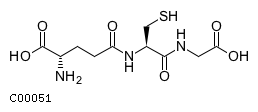

In [127]:
Image(res_kegg)

In [128]:
#Consulta PDB
from Bio.PDB import *

In [131]:
pdb = PDBList()
pdb.retrieve_pdb_file('7DWZ',pdir='.', file_format='mmCif')

'./7dwz.cif'

In [132]:
parser = MMCIFParser(QUIET=True)

In [133]:
structure = parser.get_structure('7DWZ','7dwz.cif')

In [134]:
structure.header

{'deposition_date': '2021-01-18',
 'head': 'VIRUS',
 'idcode': '7DWZ',
 'name': 'S protein of SARS-CoV-2 in the active conformation',
 'resolution': 3.3,
 'structure_method': 'ELECTRON MICROSCOPY'}

In [135]:
model = structure.get_models()

In [136]:
models = list(model)

In [138]:
chains = list(models[0].get_chains())

In [139]:
residueL = list(chains[0].get_residues())
residueH = list(chains[1].get_residues())

In [140]:
residueL

[<Residue ALA het=  resseq=27 icode= >,
 <Residue TYR het=  resseq=28 icode= >,
 <Residue THR het=  resseq=29 icode= >,
 <Residue ASN het=  resseq=30 icode= >,
 <Residue SER het=  resseq=31 icode= >,
 <Residue PHE het=  resseq=32 icode= >,
 <Residue THR het=  resseq=33 icode= >,
 <Residue ARG het=  resseq=34 icode= >,
 <Residue GLY het=  resseq=35 icode= >,
 <Residue VAL het=  resseq=36 icode= >,
 <Residue TYR het=  resseq=37 icode= >,
 <Residue TYR het=  resseq=38 icode= >,
 <Residue PRO het=  resseq=39 icode= >,
 <Residue ASP het=  resseq=40 icode= >,
 <Residue LYS het=  resseq=41 icode= >,
 <Residue VAL het=  resseq=42 icode= >,
 <Residue PHE het=  resseq=43 icode= >,
 <Residue ARG het=  resseq=44 icode= >,
 <Residue SER het=  resseq=45 icode= >,
 <Residue SER het=  resseq=46 icode= >,
 <Residue VAL het=  resseq=47 icode= >,
 <Residue LEU het=  resseq=48 icode= >,
 <Residue HIS het=  resseq=49 icode= >,
 <Residue SER het=  resseq=50 icode= >,
 <Residue THR het=  resseq=51 icode= >,


In [146]:
atoms = list(residueL[0].get_atoms())
atoms

[<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Atom CB>]

In [147]:
print(list(residueL[0].get_atoms())[0] - list(residueH[0].get_atoms())[0])

102.19576
